<a href="https://colab.research.google.com/github/Sleeveso/CSTD-Repo/blob/main/dataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing modules/libries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [2]:
#importing datasets
df = pd.read_csv('StudentsPerformance.csv')
cat_cols = df.columns[:5]
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip().str.lower())
# x = df.iloc[:,  :-1].values
x = df.drop(df.columns[5], axis=1)
#x = df.drop(df.columns[4], axis=1).iloc[:, :].values
y = df.iloc[:,  5].values
# df.info()
# print(df.isnull().sum())

FileNotFoundError: [Errno 2] No such file or directory: 'StudentsPerformance.csv'

In [ ]:
print(x)

: 

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
#filling missing data
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
#use nan to detect not numbers and replace them with coloumn 'mean'(or "median", "most_frequent", "constant")
# imputer.fit(x[:, 6:])
# x[:, 6:] = imputer.transform(x[:, 6:])
x.iloc[:, 6:] = imputer.fit_transform(x.iloc[:, 6:])


In [ ]:
print(x)

[[ 1.  0.  0. ...  0. 72. 74.]
 [ 1.  0.  0. ...  1. 90. 88.]
 [ 1.  0.  0. ...  0. 95. 93.]
 ...
 [ 1.  0.  0. ...  1. 71. 65.]
 [ 1.  0.  0. ...  1. 78. 77.]
 [ 1.  0.  0. ...  0. 86. 86.]]


Encoding categorical data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown="ignore"), list(range(4))),
                                     ("binary", OrdinalEncoder(categories=[["none", "completed"]]), [4])],
                       remainder='passthrough')
x = np.array(ct.fit_transform(x))
# le = LabelEncoder()
# y = le.fit_transform(y)
# x = np.array(ct.fit_transform(df.drop(df.columns[5], axis=1)))

In [ ]:
print(x)

[[ 1.  0.  0. ...  0. 72. 74.]
 [ 1.  0.  0. ...  1. 90. 88.]
 [ 1.  0.  0. ...  0. 95. 93.]
 ...
 [ 1.  0.  0. ...  1. 71. 65.]
 [ 1.  0.  0. ...  1. 78. 77.]
 [ 1.  0.  0. ...  0. 86. 86.]]


In [ ]:
print(y)

[ 72  69  90  47  76  71  88  40  64  38  58  40  65  78  50  69  88  18
  46  54  66  65  44  69  74  73  69  67  70  62  69  63  56  40  97  81
  74  50  75  57  55  58  53  59  50  65  55  66  57  82  53  77  53  88
  71  33  82  52  58   0  79  39  62  69  59  67  45  60  61  39  58  63
  41  61  49  44  30  80  61  62  47  49  50  72  42  73  76  71  58  73
  65  27  71  43  79  78  65  63  58  65  79  68  85  60  98  58  87  66
  52  70  77  62  54  51  99  84  75  78  51  55  79  91  88  63  83  87
  72  65  82  51  89  53  87  75  74  58  51  70  59  71  76  59  42  57
  88  22  88  73  68 100  62  77  59  54  62  70  66  60  61  66  82  75
  49  52  81  96  53  58  68  67  72  94  79  63  43  81  46  71  52  97
  62  46  50  65  45  65  80  62  48  77  66  76  62  77  69  61  59  55
  45  78  67  65  69  57  59  74  82  81  74  58  80  35  42  60  87  84
  83  34  66  61  56  87  55  86  52  45  72  57  68  88  76  46  67  92
  83  80  63  64  54  84  73  80  56  59  75  85  8

Splitting datasets into training and testing

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 1)

In [ ]:
print(f" x_train: {x_train}")
print(f" x_test: {x_test}")
print(f" y_train: {y_train}")
print(f" y_test: {y_test}")

 x_train: [[ 0.  1.  0. ...  0. 81. 71.]
 [ 0.  1.  1. ...  0. 63. 62.]
 [ 0.  1.  0. ...  1. 85. 86.]
 ...
 [ 1.  0.  0. ...  0. 75. 72.]
 [ 0.  1.  0. ...  0. 75. 77.]
 [ 1.  0.  0. ...  0. 64. 59.]]
 x_test: [[ 0.  1.  0. ...  0. 59. 54.]
 [ 1.  0.  0. ...  0. 72. 68.]
 [ 1.  0.  0. ...  0. 77. 74.]
 ...
 [ 0.  1.  0. ...  0. 76. 65.]
 [ 1.  0.  0. ...  0. 64. 62.]
 [ 0.  1.  0. ...  1. 80. 76.]]
 y_train: [ 79  63  79  66  91  67  54  69  58  74  50  99  60  68  71  74  61  71
  54  79  49  50  56  69  92  48  66  69  44  64  65  47  77  90  63  78
  38  67  46  65  65  73  67  69  93  67  86  89  58  61  40  82  88  43
  62  74  57  75  88  73  91  75  62  88  62  81  61  86  72  87  52  69
  74  39  85  73  76  65  74  35  57  90  49  66  68  59  85  77  50   8
  66  65  97  63  65  72  84  39  77  87  55  73  41  73  53  41  65  74
  19  60  91  52  62  46  87  72  86  55  59  64  64  52  68  53  72  61
  68  45  88  63  52  91  64  78  65  59  85  78  75  65  75  58  75  97
  6

Feature Scaling

In [ ]:
print(x_train[:, 16:])
print(f" x_test: {x_test[:, 16:]}")

[[81. 71.]
 [63. 62.]
 [85. 86.]
 ...
 [75. 72.]
 [75. 77.]
 [64. 59.]]
 x_test: [[ 59.  54.]
 [ 72.  68.]
 [ 77.  74.]
 [ 64.  58.]
 [ 52.  55.]
 [ 56.  51.]
 [ 50.  51.]
 [ 31.  36.]
 [ 71.  69.]
 [ 84.  82.]
 [ 66.  60.]
 [ 55.  54.]
 [ 76.  67.]
 [ 80.  75.]
 [ 72.  69.]
 [ 81.  84.]
 [ 86.  90.]
 [ 95.  92.]
 [ 60.  63.]
 [ 48.  52.]
 [ 84.  87.]
 [ 86.  84.]
 [ 77.  73.]
 [ 61.  54.]
 [ 59.  50.]
 [ 69.  65.]
 [ 76.  70.]
 [ 62.  68.]
 [ 66.  65.]
 [ 70.  73.]
 [ 42.  48.]
 [ 76.  74.]
 [ 55.  47.]
 [ 64.  68.]
 [ 59.  62.]
 [ 85.  76.]
 [ 74.  72.]
 [ 59.  59.]
 [ 65.  60.]
 [ 93.  93.]
 [ 84.  78.]
 [ 76.  78.]
 [ 72.  74.]
 [ 74.  74.]
 [ 86.  92.]
 [ 91.  89.]
 [ 66.  62.]
 [ 73.  68.]
 [ 58.  49.]
 [ 99.  95.]
 [ 81.  84.]
 [ 87.  82.]
 [ 74.  73.]
 [ 81.  79.]
 [ 75.  81.]
 [ 56.  47.]
 [ 76.  80.]
 [ 82.  76.]
 [ 47.  56.]
 [ 99. 100.]
 [ 52.  44.]
 [ 52.  51.]
 [ 45.  41.]
 [ 58.  57.]
 [ 52.  51.]
 [ 64.  67.]
 [ 58.  62.]
 [ 59.  64.]
 [ 41.  47.]
 [ 32.  28.]
 [ 61.  5

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 16:] = sc.fit_transform(x_train[:, 16:])
x_test[:, 16:] = sc.transform(x_test[:, 16:])
#

In [ ]:
print(x_train)
print(f" x_test: {x_test}")

[[ 0.          1.          0.         ...  0.          0.81569959
   0.18854418]
 [ 0.          1.          1.         ...  0.         -0.41865036
  -0.40529575]
 [ 0.          1.          0.         ...  1.          1.08999958
   1.17827738]
 ...
 [ 1.          0.          0.         ...  0.          0.40424961
   0.25452639]
 [ 0.          1.          0.         ...  0.          0.40424961
   0.58443746]
 [ 1.          0.          0.         ...  0.         -0.35007536
  -0.60324239]]
 x_test: [[ 0.          1.          0.         ...  0.         -0.69295035
  -0.93315346]
 [ 1.          0.          0.         ...  0.          0.19852462
  -0.00940247]
 [ 1.          0.          0.         ...  0.          0.54139961
   0.38649082]
 ...
 [ 0.          1.          0.         ...  0.          0.47282461
  -0.20734911]
 [ 1.          0.          0.         ...  0.         -0.35007536
  -0.40529575]
 [ 0.          1.          0.         ...  1.          0.7471246
   0.51845524]]


Gender Distribution

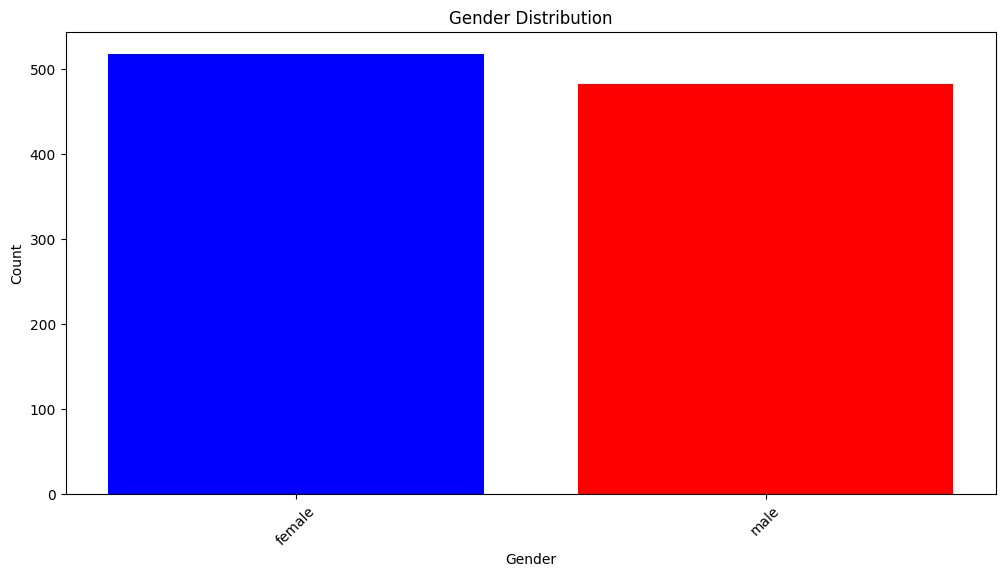

In [8]:
import seaborn as sns
plt.figure(figsize=(12, 6))
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color= ["blue", "red"])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.xticks(rotation=45)

plt.show()


Race/Ethnicity Distribution

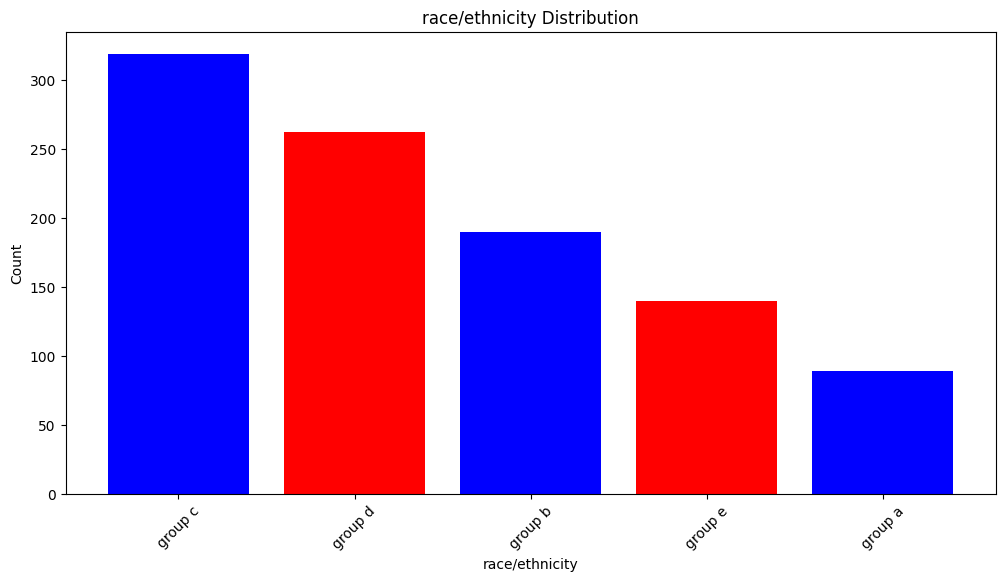

In [9]:
plt.figure(figsize=(12, 6))
gender_counts = df['race/ethnicity'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color= ["blue", "red"])
plt.xlabel('race/ethnicity')
plt.ylabel('Count')
plt.title('race/ethnicity Distribution')

plt.xticks(rotation=45)

plt.show()

Parental Education vs Student Performance

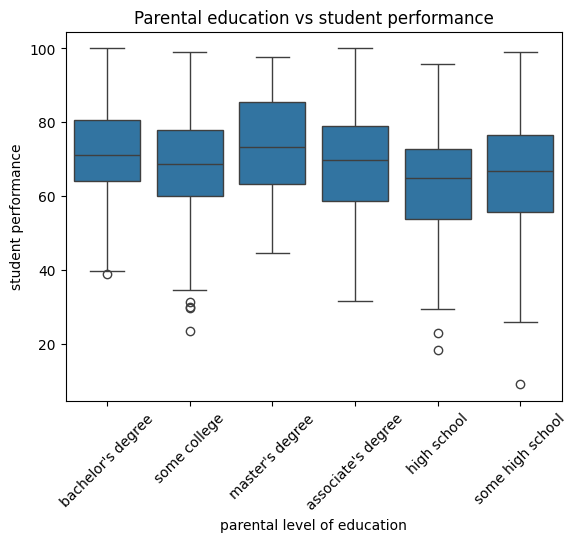

In [21]:
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

sns.boxplot(x="parental level of education", y= "average_score", data=df)

plt.title('Parental education vs student performance')
plt.xlabel('parental level of education')
plt.ylabel('student performance')

plt.xticks(rotation=45)

plt.show()

Correlation between Math, Reading, Writing

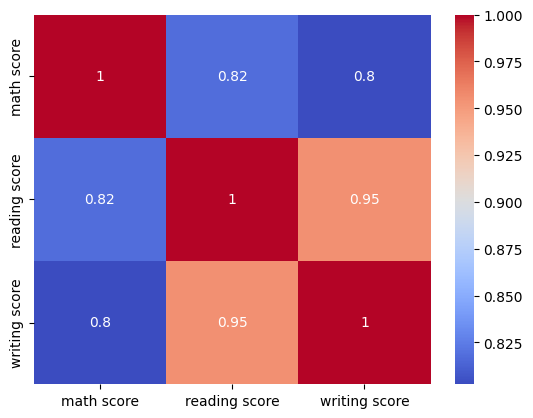

In [22]:
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap="coolwarm")
plt.show()